In [10]:
#https://photutils.readthedocs.io/en/stable/isophote.html
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image

In [11]:
#Simulated galaxy
g = Gaussian2D(100.0, 75, 75, 20, 12, theta=40.0 * np.pi / 180.0)
ny = nx = 150
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0.0, stddev=2.0, seed=1234)
data = g(x, y) + noise

In [12]:
from astropy.io import fits
data = fits.getdata("Galaxies/M60.fits", ext=0)

In [13]:
# from astropy.io import fits
# data = fits.getdata("NGC5334_skv19718873858546.fits", ext=0)

In [14]:
data

array([[-0.00601196,  0.01371765,  0.03674316, ...,  0.02020264,
        -0.00281525,  0.00376129],
       [ 0.05645752,  0.00056171,  0.01371765, ...,  0.00704956,
        -0.02581787,  0.0760498 ],
       [-0.01586914,  0.02359009, -0.02902222, ..., -0.01925659,
         0.02679443,  0.04321289],
       ...,
       [ 0.00419617,  0.00418854,  0.03942871, ...,  0.01879883,
         0.05010986,  0.01489258],
       [ 0.00810242,  0.00027895,  0.000278  , ...,  0.0305481 ,
         0.03442383,  0.05010986],
       [ 0.03942871,  0.01983643,  0.01593018, ...,  0.01098633,
         0.02270508,  0.01489258]], dtype='>f4')

In [15]:
# Provide an initial ellipse:
from photutils.isophote import EllipseGeometry

geometry = EllipseGeometry(x0=512, y0=512, sma=400, eps=0.01, pa=55.0 * np.pi / 180.0)

(<matplotlib.patches.Ellipse at 0x7fedec40b970>,)

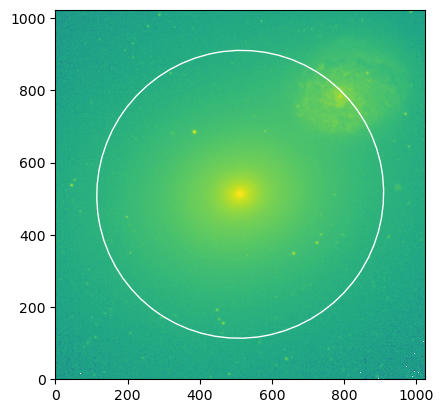

In [16]:
#Visualise initial ellipse
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from photutils.aperture import EllipticalAperture
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma, geometry.sma * (1 - geometry.eps), geometry.pa)
plt.imshow(data, origin='lower',norm=colors.LogNorm())
aper.plot(color='white')

In [17]:
#Fit the ellipse to the data
from photutils.isophote import Ellipse

ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image(step=0.05,maxsma=500)

/Users/lanjingbo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lanjingbo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/lanjingbo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lanjingbo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/lanjingbo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [18]:
isolist.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int64,int64,int64,int64
0.0,28.19090247104911,0.0,0.0,0.0,0.0,0.0,0.0,None,None,511.1833406773138,0.0,511.9290919631584,0.0,1,0,0,0
0.5001796504944394,27.983117629978178,0.01194646452946178,0.1691217385769515,0.10565057107385557,13.867808284849737,20.199931996806505,-0.6678036689569774,0.3554423007728308,0.5322556872560845,511.1833406773138,0.031584493522905134,511.9290919631584,0.02754716103656222,13,0,10,0
0.5251886330191613,27.968109754209742,0.012538469663349448,0.17081820476287526,0.10596379026150177,14.037126435815825,20.074049579070376,-0.6642795700916513,0.35722339417860915,0.5377606210730261,511.1929264909358,0.03332392677577665,511.9271156101108,0.0290224685449013,13,0,10,0
0.5514480646701194,27.952380824840002,0.013160180054451768,0.17270903698567017,0.10621501754353734,14.20826973734441,19.93180055444034,-0.6604801873545787,0.3591539257554342,0.5437769862468599,511.2030439836618,0.03514172981039462,511.92520361702486,0.030575819663737534,13,0,10,0
0.5790204679036254,27.935909074824842,0.013812353977421556,0.1748360548350676,0.1065894731491054,14.382203013767873,19.774866163271895,-0.6563194646157291,0.3612417382102191,0.5504053402129767,511.2137387674601,0.03709931118558594,511.9233738595897,0.032215215444232254,13,0,10,0
0.6079714912988067,27.918678122646934,0.014494528530638689,0.177256567642779,0.10700735129060776,14.567306663395684,19.60637899321279,-0.6515281366343824,0.3635342425637829,0.5579716701748327,511.2250853942206,0.03924963303431204,511.9216350900307,0.03397855859627429,13,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380.9523809523809,0.21472797477913824,0.0017613905956446808,0.5295303620335846,0.004979443113076592,38.70476340109088,0.3740982690125365,-0.001242359091885715,5.5764515005231904e-05,0.044885987770725555,588.1188024152651,1.5741650390170552,577.0712857550847,1.4076716662842985,1595,0,11,0


In [19]:
isolist.intens

array([28.19090247, 27.98311763, 27.96810975, 27.95238082, 27.93590907,
       27.91867812, 27.90065591, 27.88169577, 27.86177493, 27.83922243,
       27.79847774, 27.75961937, 27.71325118, 27.68061611, 27.63541947,
       27.58366461, 27.53298596, 27.4842406 , 27.41094879, 27.33733163,
       27.25624185, 27.12663557, 27.03263813, 26.94245394, 26.83864118,
       26.72346228, 26.60900059, 26.47400467, 26.32869222, 26.17839653,
       26.0257114 , 25.8660713 , 25.69340436, 25.50916733, 25.31409657,
       25.09685082, 24.85217371, 24.63069299, 24.34746617, 24.0788345 ,
       23.81539723, 23.52782516, 23.25305949, 22.96622921, 22.66216232,
       22.36271261, 22.0256478 , 21.69379569, 21.35257185, 21.00664035,
       20.63687684, 20.2663562 , 19.89432153, 19.51488968, 19.12635771,
       18.71064584, 18.27405391, 17.79914876, 17.31475356, 16.80854094,
       16.29996355, 15.7646296 , 15.19802658, 14.65495869, 14.13204486,
       13.60928399, 13.05577997, 12.50132096, 11.94530803, 11.42

In [20]:
# Build a model image
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, isolist)
residual = data - model_image

Text(0.5, 1.0, 'Residual')

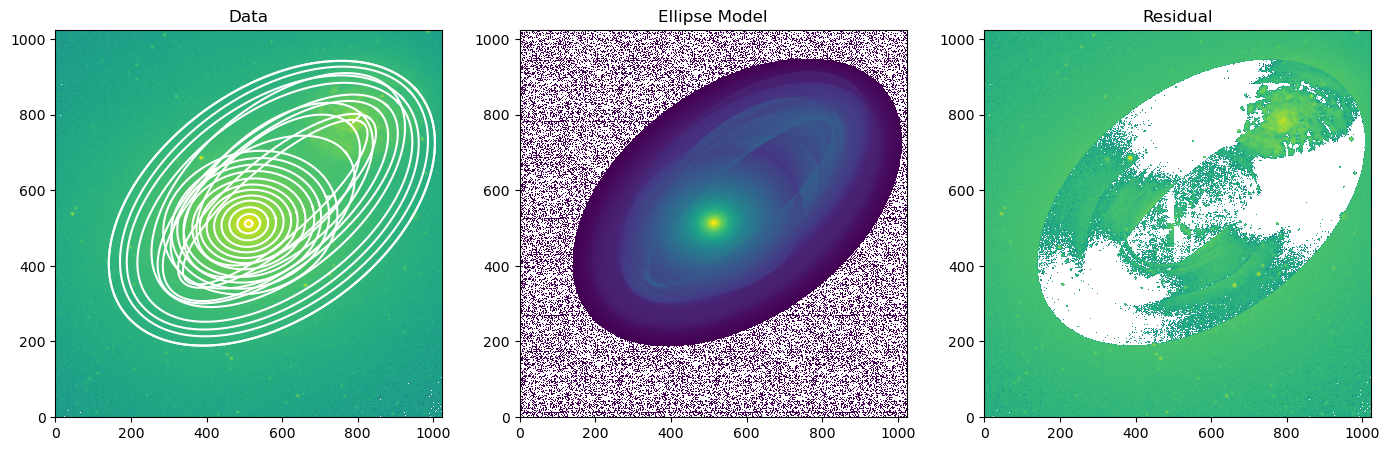

In [21]:
#Plot the image
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower',norm=colors.LogNorm())
ax1.set_title('Data')

smas = np.linspace(10, 500, 25)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower',norm=colors.LogNorm())
ax2.set_title('Ellipse Model')

ax3.imshow(residual, origin='lower',norm=colors.LogNorm())
ax3.set_title('Residual')

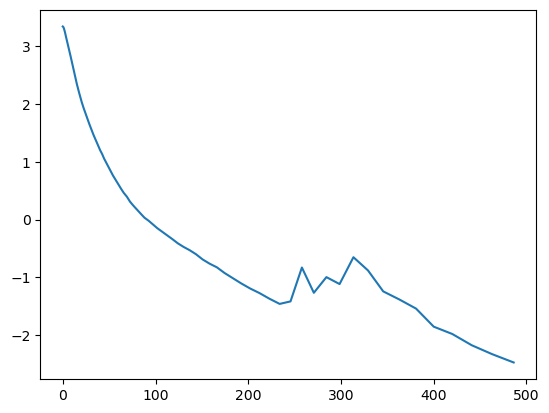

In [22]:
plt.plot(isolist.sma, np.log(isolist.intens))

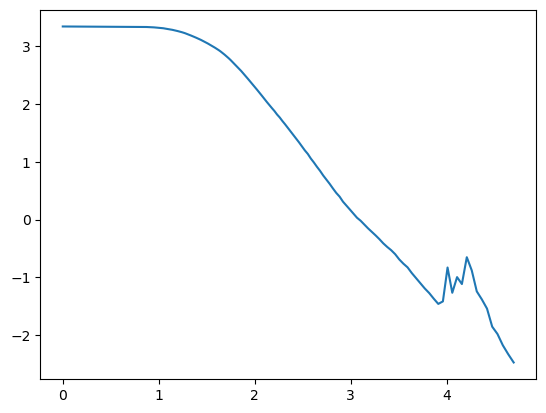

In [23]:
plt.plot(isolist.sma**(1/4), np.log(isolist.intens))